In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11182713153490253826, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17254906923369155347
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5715119054352021640
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146660416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8274717905609309740
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install -q keras

In [5]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/traincopy.zip" -d "/content/drive/My Drive/Colab Notebooks/train/"

In [6]:
train_path = '/content/drive/My Drive/Colab Notebooks/train/train copy/train'
test_path = '/content/drive/My Drive/Colab Notebooks/train/train copy/test'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train = train_datagen.flow_from_directory(train_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=64)
test = test_datagen.flow_from_directory(test_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=64)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'max', weights = 'imagenet'))
model.add(Dense(1, activation = 'sigmoid'))

model.layers[0].trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=5)

Epoch 1/5
351/351 [==============================] - 208s 592ms/step - loss: 0.1741 - accuracy: 0.9647 - val_loss: 0.1252 - val_accuracy: 0.9740
Epoch 2/5
351/351 [==============================] - 203s 579ms/step - loss: 0.0671 - accuracy: 0.9846 - val_loss: 0.1498 - val_accuracy: 0.9744
Epoch 3/5
351/351 [==============================] - 208s 593ms/step - loss: 0.0536 - accuracy: 0.9874 - val_loss: 0.1002 - val_accuracy: 0.9792
Epoch 4/5
351/351 [==============================] - 204s 580ms/step - loss: 0.0428 - accuracy: 0.9890 - val_loss: 0.1772 - val_accuracy: 0.9728
Epoch 5/5
351/351 [==============================] - 202s 574ms/step - loss: 0.0445 - accuracy: 0.9893 - val_loss: 0.0767 - val_accuracy: 0.9836


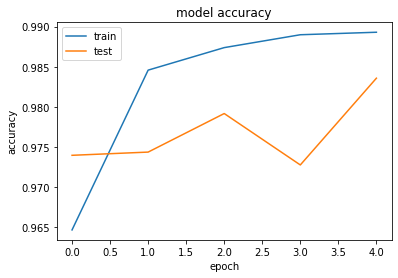

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
